# Baseball Player Salary Prediction via Ridge, Lasso and ElasticNet

# Business Problem

In this section, we will go through the **Hitters** dataset as firstly analyzing the data, then preprocessing it and lastly creating 3 different models with different algorithms which they will be used respectively;
* Ridge
* Lasso
* ElasticNet

To conclude, we will apply a comparison between the models to indicate the performance changes.


# Main Headings

* [Dataset Story](#story)
* [Required Libraries](#libraries)
* [Importing the Dataset](#import)
* [Exploratory Data Analysis (EDA)](#eda)
  * [General Information About the Dataset](#generalInfo)
  * [Analysis of Categorical and Numerical Variables](#catNum)
  * [Target Analysis](#target)
  * [Correlation Analysis](#correlation)
* [Data Preprocessing](#preprocessing)
  * [Missing Value Analysis](#missingValue)
  * [Outlier Analysis](#outlier)
  * [Encoding](#encoding)
* [Ridge Regression](#ridge)
  * [Creating a Base Ridge Model](#baseRidge)
  * [Loading a Base Ridge Model & Prediction](#predictionBaseRidge)
  * [Tuning the Ridge Model](#tuneRidge)
  * [Loading a Tuned Ridge Model & Prediction](#predictionTunedRidge)
* [Lasso Regression](#lasso)
  * [Creating a Base Lasso Model](#baseLasso)
  * [Loading a Base Lasso Model & Prediction](#predictionBaseLasso)
  * [Tuning the Lasso Model](#tuneLasso)
  * [Loading a Tuned Lasso Model & Prediction](#predictionTunedLasso)
* [ElasticNet Model](#elasticnet)
  * [Creating a Base ElasticNet Model](#baseElasticnet)
  * [Loading a Base ElasticNet Model & Prediction](#predictionBaseElasticnet)
  * [Tuning the ElasticNet Model](#tuneElasticnet)
  * [Loading a Tuned ElasticNet Model & Prediction](#predictionTunedElasticnet)

<a id="story" ></a>

# Dataset Story

This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

Format

A data frame with 322 observations of major league players on the following 20 variables.

* AtBat Number of times at bat in 1986
* Hits Number of hits in 1986
* HmRun Number of home runs in 1986
* Runs Number of runs in 1986
* RBI Number of runs batted in in 1986
* Walks Number of walks in 1986
* Years Number of years in the major leagues
* CAtBat Number of times at bat during his career
* CHits Number of hits during his career
* CHmRun Number of home runs during his career
* CRuns Number of runs during his career
* CRBI Number of runs batted in during his career
* CWalks Number of walks during his career
* League A factor with levels A and N indicating player’s league at the end of 1986
* Division A factor with levels E and W indicating player’s division at the end of 1986
* PutOuts Number of put outs in 1986
* Assists Number of assists in 1986
* Errors Number of errors in 1986
* Salary 1987 annual salary on opening day in thousands of dollars
* NewLeague A factor with levels A and N indicating player’s league at the beginning of 1987

<a id="story" ></a>

# Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
# import statsmodels.api as sm
import joblib

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

import warnings
warnings.filterwarnings("ignore")

<a id="import" ></a>

# Importing the Dataset

In [2]:
hitters = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Hitters.csv")
df = hitters.copy()

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


<a id="eda" ></a>

# Exploratory Data Analysis

<a id="generalInfo" ></a>

## General Information About the Dataset

In [4]:
def check_df(dataframe, head=5, tail=5):
    print('*'*20, 'HEAD', '*'*20)
    print(dataframe.head(head))
    print('*'*20, 'TAIL', '*'*20)
    print(dataframe.tail(tail))
    print('*'*20, 'SHAPE', '*'*20)
    print(dataframe.shape)
    print('*'*20, 'TYPES', '*'*20)
    print(dataframe.dtypes)
    print('*'*20, 'SIZE', '*'*20)
    print(dataframe.size)
    print('*'*20, 'NA', '*'*20)
    print(dataframe.isnull().sum())
    print('*'*20, 'QUARTILES', '*'*20)
    print(dataframe.describe([0, 0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

******************** HEAD ********************
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        W      632       43      10 475.000         N
2    479   130     18    66   72     76      3    1624    457      63    224   266     263      A        W      880       82      14 480.000         A
3    496   141     20    65   78     37     11    5628   1575     225    828   838     354      N        E      200       11       3 500.000         N
4    321    87     10    39   42     30      2     396    101      12     48    46      33      N        E      805       40       4  91.500         N
******************** TAIL ********************


<a id="catNum" ></a>

## Analysis of Categorical and Numerical Variables

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20, report=False):
    # categorical
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object", "bool", "category"]]
    num_but_cat = [col for col in dataframe.columns if (dataframe[col].nunique() < cat_th and str(dataframe[col].dtypes) in ["uint8", "int64", "float64"])]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # numerical
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uin8"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    if report:
        print(f"Observation: {dataframe.shape[0]}")
        print(f"Variables: {dataframe.shape[1]}")
        print(f"Categorical Features: {len(cat_cols)}")
        print(f"Numerical Features: {len(num_cols)}")
        print(f"High Cardinality Features: {len(cat_but_car)}")
        print(f"Numerical But Categorical Features: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car, num_but_cat

In [7]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df, report=True)

Observation: 322
Variables: 20
Categorical Features: 3
Numerical Features: 17
High Cardinality Features: 0
Numerical But Categorical Features: 0


In [8]:
def num_summary(dataframe, num_col, plot=False):
    print(20*"=", num_col, 20*"=")
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        sns.set()
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

In [9]:
def num_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

==================== AtBat ====================
count   322.000
mean    380.929
std     153.405
min      16.000
1%       20.420
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


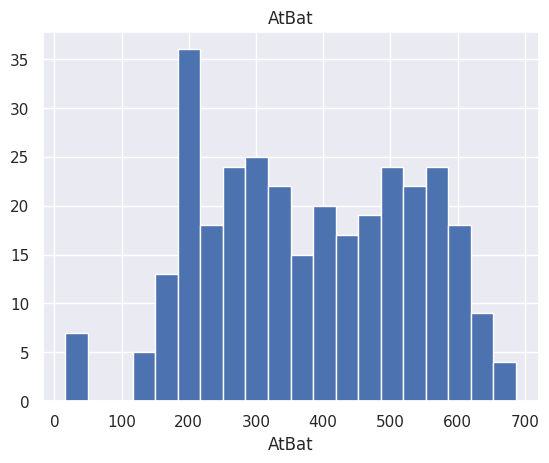

==================== Hits ====================
count   322.000
mean    101.025
std      46.455
min       1.000
1%        4.420
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


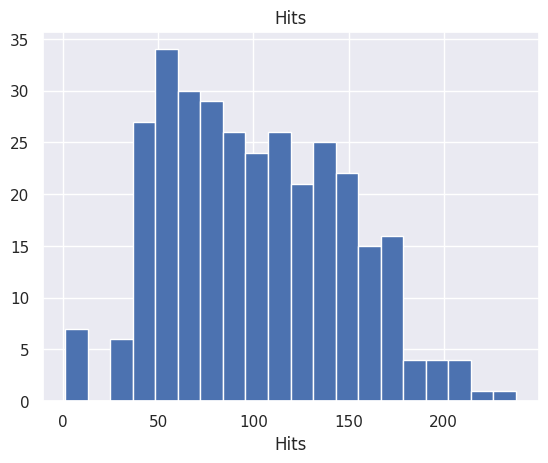

==================== HmRun ====================
count   322.000
mean     10.770
std       8.709
min       0.000
1%        0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


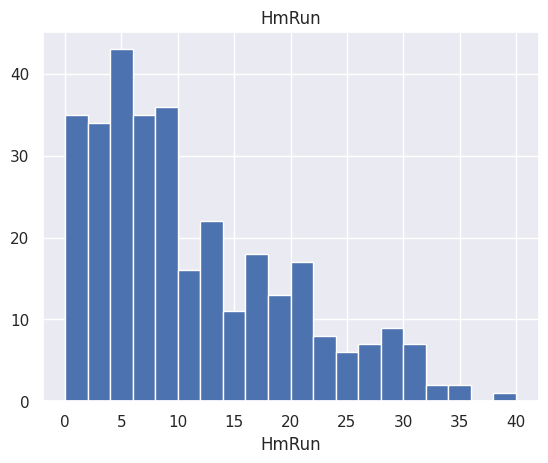

==================== Runs ====================
count   322.000
mean     50.910
std      26.024
min       0.000
1%        1.210
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


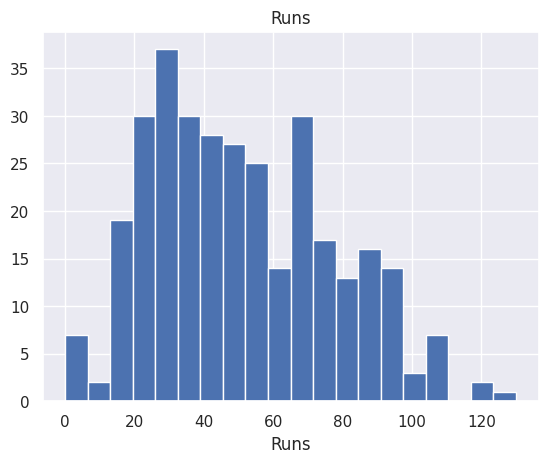

==================== RBI ====================
count   322.000
mean     48.028
std      26.167
min       0.000
1%        2.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


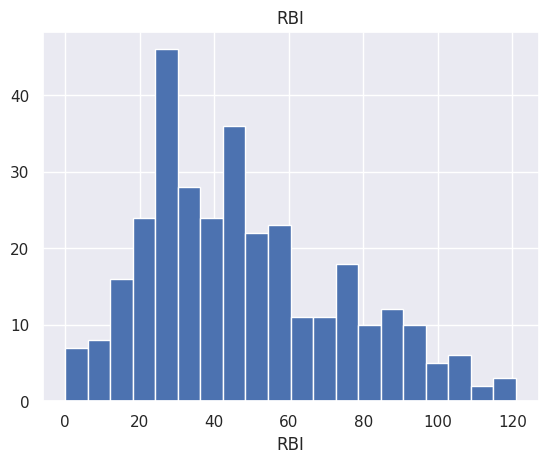

==================== Walks ====================
count   322.000
mean     38.742
std      21.639
min       0.000
1%        1.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


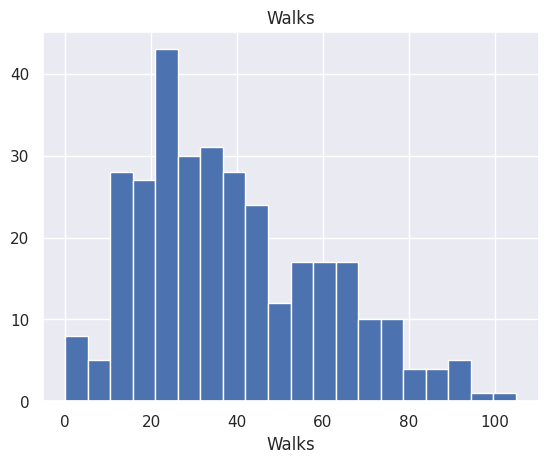

==================== Years ====================
count   322.000
mean      7.444
std       4.926
min       1.000
1%        1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


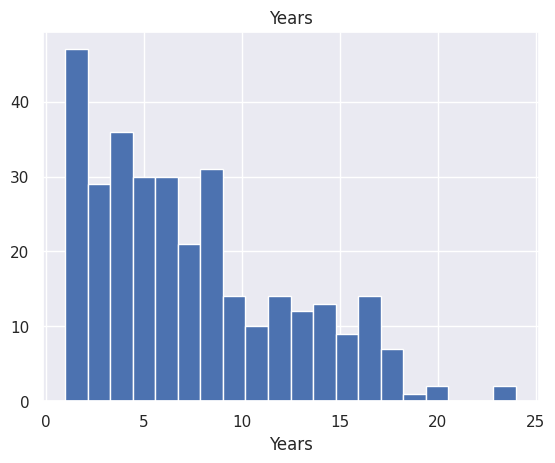

==================== CAtBat ====================
count     322.000
mean     2648.683
std      2324.206
min        19.000
1%         41.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


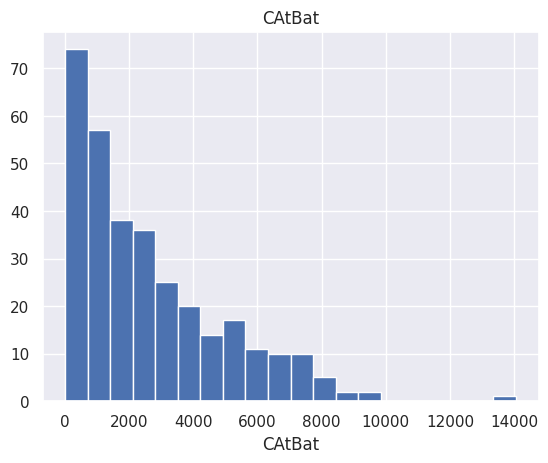

==================== CHits ====================
count    322.000
mean     717.571
std      654.473
min        4.000
1%         9.840
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


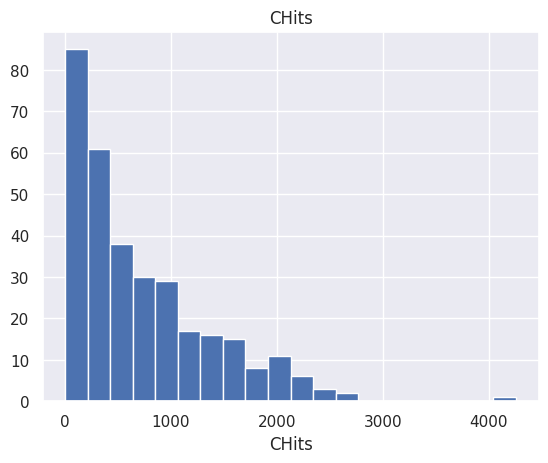

==================== CHmRun ====================
count   322.000
mean     69.491
std      86.266
min       0.000
1%        0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


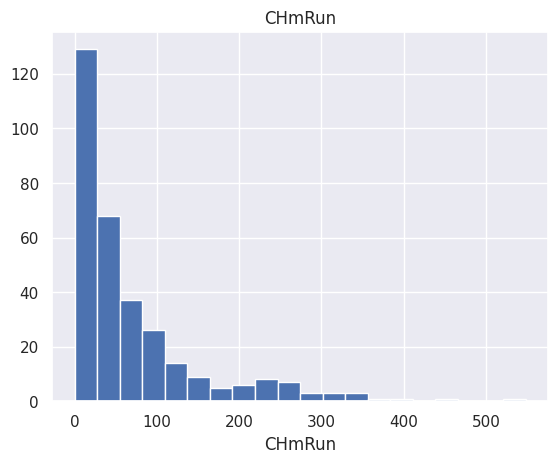

==================== CRuns ====================
count    322.000
mean     358.795
std      334.106
min        1.000
1%         3.630
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


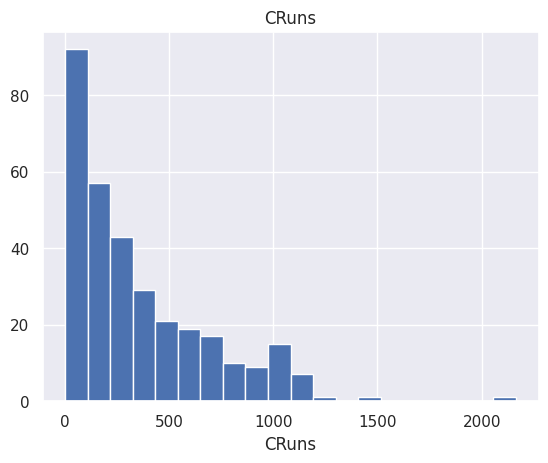

==================== CRBI ====================
count    322.000
mean     330.118
std      333.220
min        0.000
1%         4.630
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


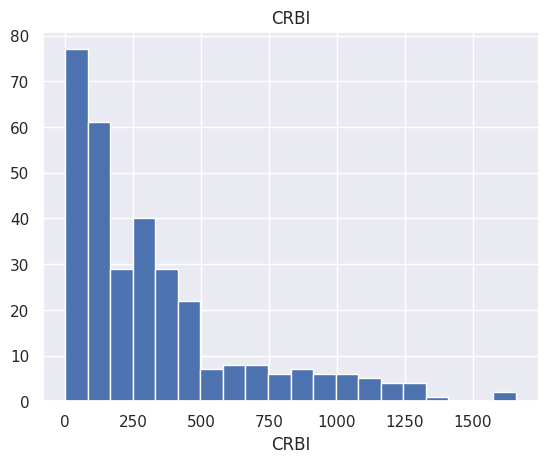

==================== CWalks ====================
count    322.000
mean     260.239
std      267.058
min        0.000
1%         4.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


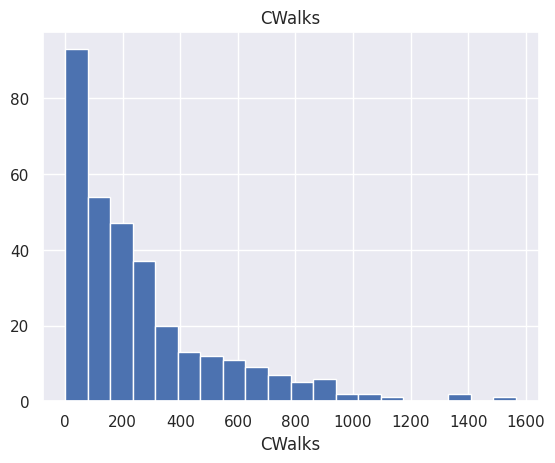

==================== PutOuts ====================
count    322.000
mean     288.938
std      280.705
min        0.000
1%         0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


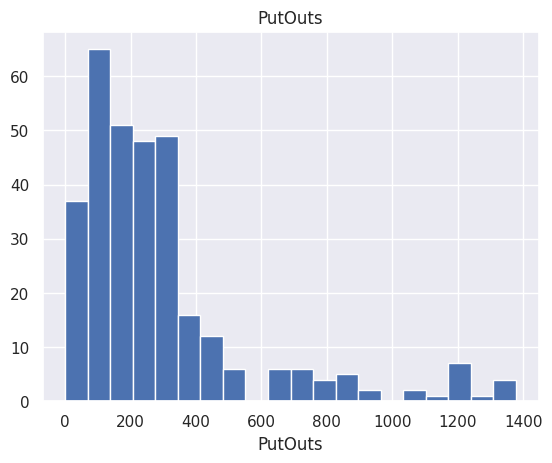

==================== Assists ====================
count   322.000
mean    106.913
std     136.855
min       0.000
1%        0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


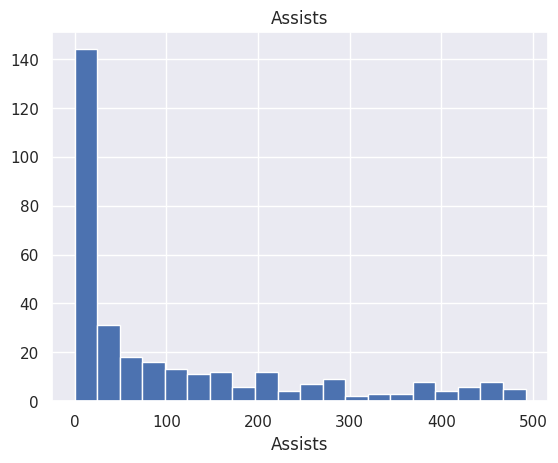

==================== Errors ====================
count   322.000
mean      8.040
std       6.368
min       0.000
1%        0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


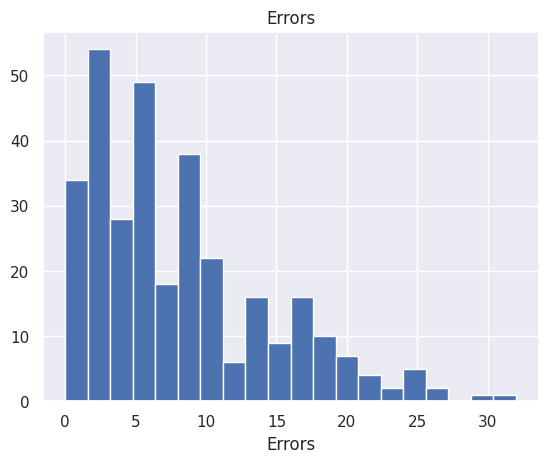

==================== Salary ====================
count    263.000
mean     535.926
std      451.119
min       67.500
1%        70.000
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


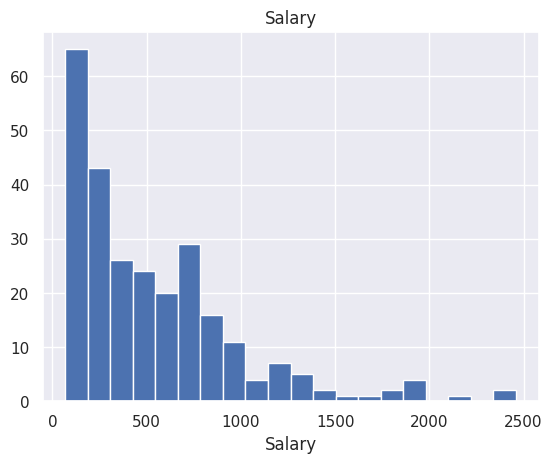

In [10]:
num_summary_df(df)

In [11]:
def plot_num_summary(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    num_plots = len(num_cols)
    rows = math.ceil(num_plots/2)
    cols = 2 if num_plots > 1 else 1
    plt.figure(figsize=(10*cols, 4*rows))
    for index, col in enumerate(num_cols):
        plt.subplot(rows, cols, index+1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

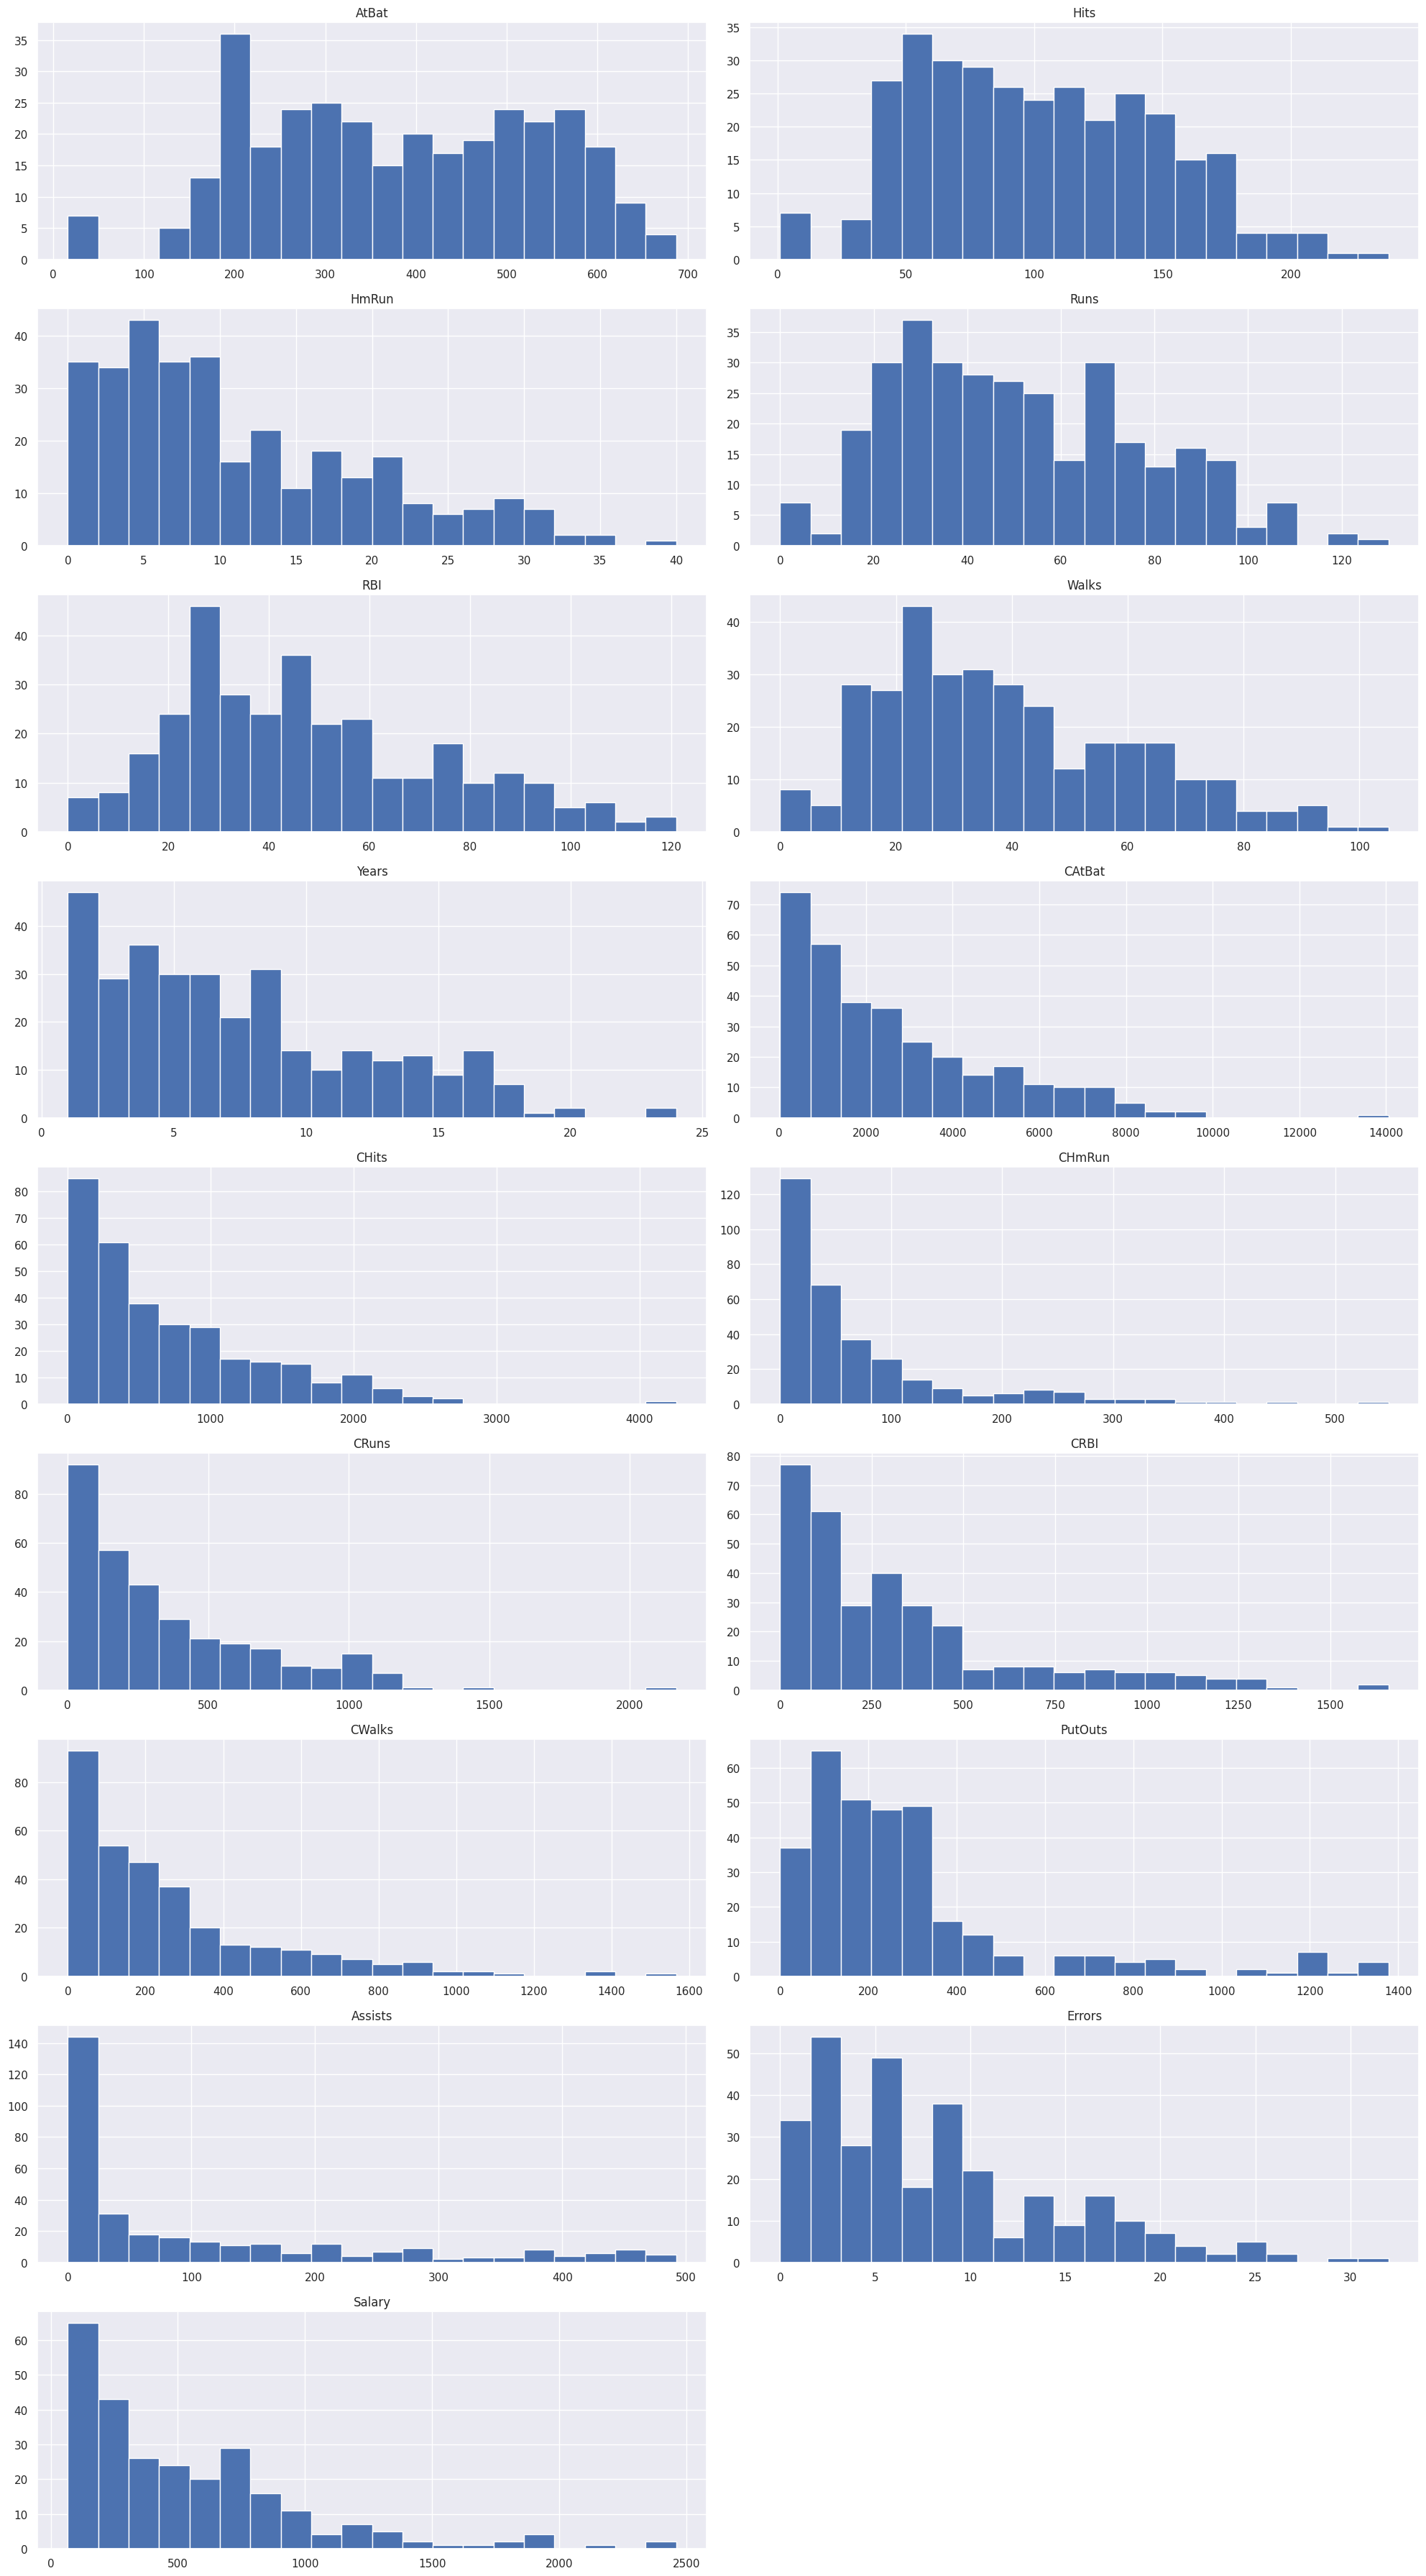

In [12]:
plot_num_summary(df)

In [13]:
def cat_summary(dataframe, col_name, plot=False):
    print(20*"=", col_name, 20*"=")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                 "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [14]:
def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in cat_cols:
        if str(dataframe[col].dtypes) == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype(int)
            cat_summary(new_df, col, plot=True)
        else:
            cat_summary(dataframe, col, plot=True)

==================== League ====================
        League  Ratio
League               
A          175 54.348
N          147 45.652


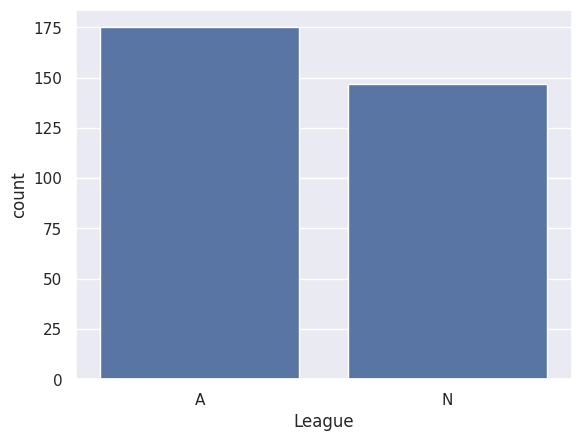

==================== Division ====================
          Division  Ratio
Division                 
W              165 51.242
E              157 48.758


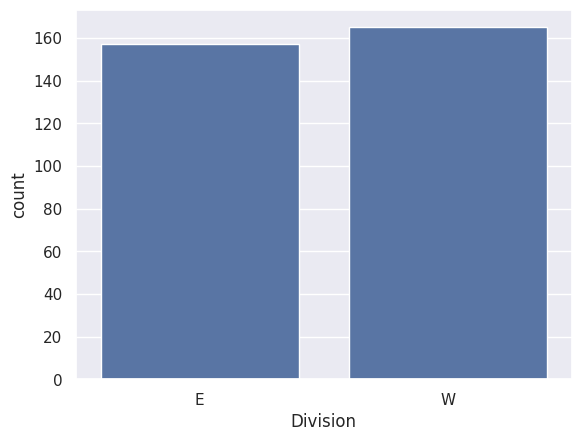

==================== NewLeague ====================
           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342


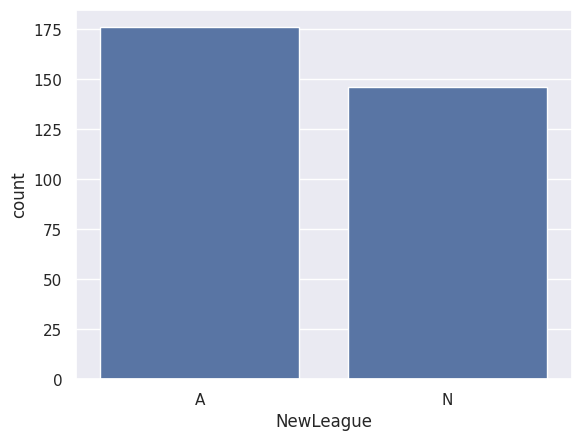

In [15]:
cat_summary_df(df)

<a id="target" ></a>

## Target Analysis

In [16]:
def cat_target(dataframe, target, target_th=20):
    if dataframe[target].nunique() > target_th:
        target_desc = dataframe[target].describe()
        dataframe["cat_" + target] = pd.cut(dataframe[target], [target_desc[3], target_desc[4],
                                                 target_desc[5], target_desc[6], target_desc[7]])

In [17]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(20*"=", target, "===>", numerical_col, 20*"=")
    if ("cat_" + target) in dataframe.columns:
        print(pd.DataFrame({"Target Mean": dataframe.groupby("cat_" + target)[numerical_col].mean()}))
    else:
        print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

In [18]:
def target_summary_with_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        if col == target:
            continue
        else:
            target_summary_with_num(dataframe, target, col)

In [19]:
cat_target(df, "Salary")

In [20]:
target_summary_with_num_df(df, 'Salary')

==================== Salary ===> AtBat ====================
                 Target Mean
cat_Salary                  
(67.5, 190.0]        349.333
(190.0, 425.0]       350.582
(425.0, 750.0]       425.687
(750.0, 2460.0]      498.565
==================== Salary ===> Hits ====================
                 Target Mean
cat_Salary                  
(67.5, 190.0]         87.939
(190.0, 425.0]        91.716
(425.0, 750.0]       117.134
(750.0, 2460.0]      137.435
==================== Salary ===> HmRun ====================
                 Target Mean
cat_Salary                  
(67.5, 190.0]          8.864
(190.0, 425.0]         9.955
(425.0, 750.0]        11.403
(750.0, 2460.0]       16.758
==================== Salary ===> Runs ====================
                 Target Mean
cat_Salary                  
(67.5, 190.0]         43.697
(190.0, 425.0]        48.313
(425.0, 750.0]        57.358
(750.0, 2460.0]       71.274
==================== Salary ===> RBI ====================
        

<a id="correlation" ></a>

## Correlation Analysis

In [21]:
df = hitters.copy()

In [22]:
def high_correlated_cols(dataframe, corr_th=0.90, remove=False, plot=False):
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if drop_list == []:
        print(20*"=", "After Correlation Analysis, You Don't Need to Remove Any Variables", 20*"=")
    if remove:
        dataframe = dataframe.drop(drop_list, axis=1)
    if plot:
        num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
        plt.figure(figsize=(int(dataframe.shape[1]), int(dataframe.shape[1])))
        sns.heatmap(dataframe[num_cols].corr(), cmap="RdBu", annot=True)
        plt.show(block=True)
    return drop_list

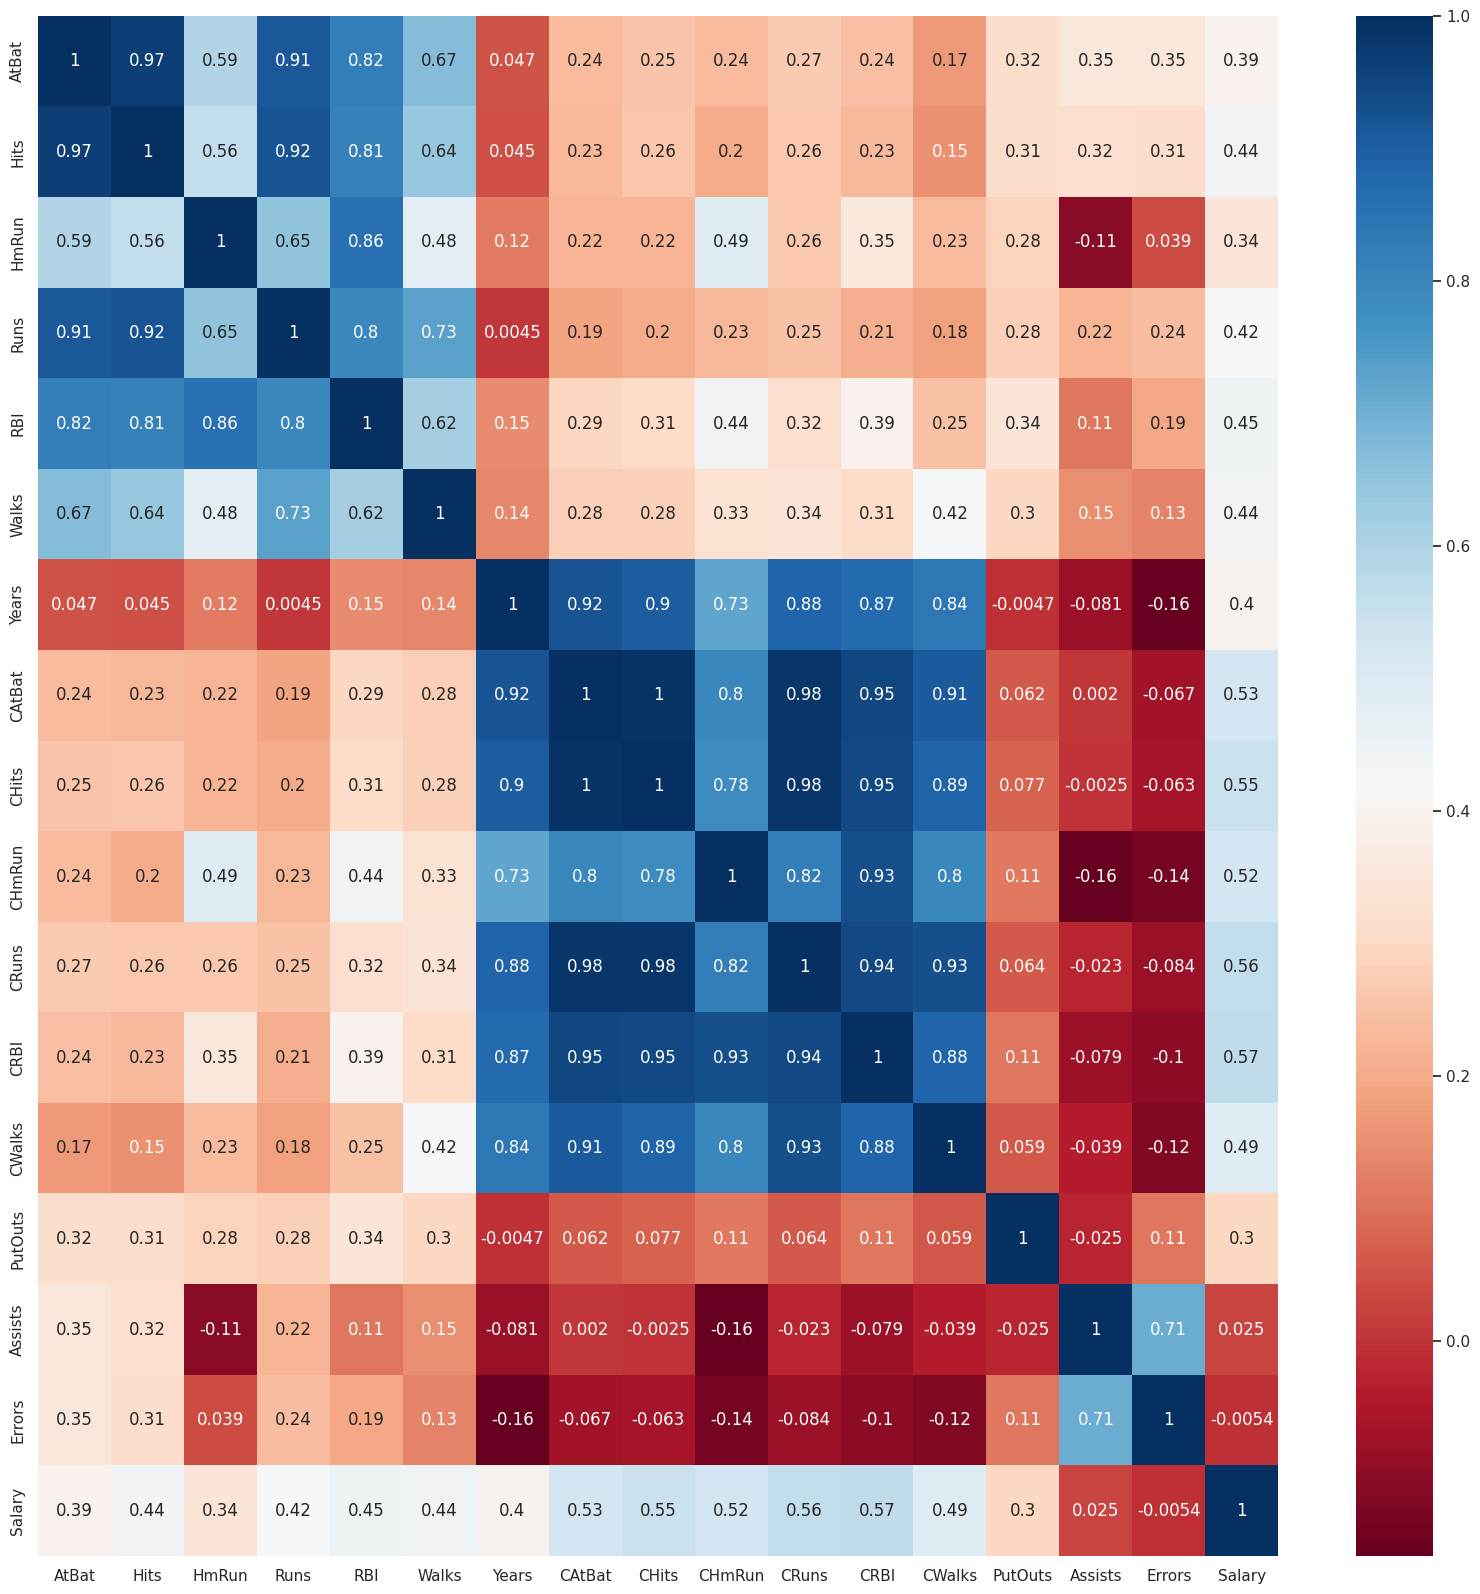

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [23]:
high_correlated_cols(df, plot=True)

<a id="preprocessing" ></a>

# Data Preprocessing

<a id="missingValue" ></a>

## Missing Value Analysis

In [24]:
df.isnull().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [25]:
def missing_value_table(dataframe, na_names=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df)

  if na_names:
    print(20*"=", "Na Columns", 20*"=")
    print(na_columns)
    return na_columns

In [26]:
na_columns = missing_value_table(df, na_names=True)

        n_miss  ratio
Salary      59 18.320
==================== Na Columns ====================
['Salary']


In [27]:
def fill_na_with_median(dataframe):
  dataframe = dataframe.apply(lambda x: x.fillna(x.median()) if x.dtype not in ["category", "object", "bool"] else x, axis=0)
  return dataframe

In [28]:
df = fill_na_with_median(df)

In [29]:
df.isnull().sum().sum()

0

<a id="outlier" ></a>

## Outlier Analysis

In [30]:
def outlier_threshold(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  iqr = quartile3 - quartile1
  low_limit = quartile1 - 1.5*iqr
  up_limit = quartile3 + 1.5*iqr
  return low_limit, up_limit

In [31]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_threshold(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [32]:
def replace_with_thresholds_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    replace_with_thresholds(dataframe, col)

In [33]:
replace_with_thresholds_df(df)

<a id="encoding" ></a>

## Encoding

### One Hot Encoding

In [34]:
def one_hot_encoding(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=True)
  return dataframe

In [35]:
df = one_hot_encoding(df)

In [36]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.000,66.000,1,30.000,29.000,14.000,1.000,293.000,66.000,1,30.000,29.000,14.000,446.000,33.000,20,425.000,False,False,False
1,315.000,81.000,7,24.000,38.000,39.000,14.000,3449.000,835.000,69,321.000,414.000,375.000,632.000,43.000,10,475.000,True,True,True
2,479.000,130.000,18,66.000,72.000,76.000,3.000,1624.000,457.000,63,224.000,266.000,263.000,648.625,82.000,14,480.000,False,True,False
3,496.000,141.000,20,65.000,78.000,37.000,11.000,5628.000,1575.000,204,828.000,838.000,354.000,200.000,11.000,3,500.000,True,False,True
4,321.000,87.000,10,39.000,42.000,30.000,2.000,396.000,101.000,12,48.000,46.000,33.000,648.625,40.000,4,91.500,True,False,True


<a id="ridge" ></a>

# Ridge Regression

In [37]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

In [39]:
ridge_model.intercept_

254.67681940597888

In [40]:
ridge_model.coef_

array([-9.77829844e-01,  3.53561521e+00,  8.05323026e+00,  7.83150691e-01,
       -2.97498582e+00,  1.57681196e+00, -1.79716442e+01, -2.22562106e-01,
        9.90163594e-01,  5.66499758e-01,  1.67520531e-01,  1.72859514e-01,
       -4.05571774e-02,  4.02264691e-01,  2.75287053e-01, -3.09466248e+00,
        6.40629774e+01, -7.00277060e+01, -3.19185491e+01])

<a id="baseRidge" ></a>

## Creating a Base Ridge Model

In [41]:
def Ridge_Model(dataframe, target, test_size=0.20, alpha=0.1 ,results=False, save_model=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  ridge_model = Ridge(alpha=alpha).fit(X_train, y_train)

  if results:
    y_pred_train = ridge_model.predict(X_train)
    y_pred_test = ridge_model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred=y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred=y_pred_test)
    rmse_train = root_mean_squared_error(y_train, y_pred=y_pred_train)
    rmse_test = root_mean_squared_error(y_test, y_pred=y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred=y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred=y_pred_test)
    r2_train = r2_score(y_train, y_pred=y_pred_train)
    r2_test = r2_score(y_test, y_pred=y_pred_test)
    print(10*"=", "Results of Train Data", 10*"=")
    print("MSE Train: ", "%.4f" % mse_train)
    print("RMSE Train: ", "%.4f" % rmse_train)
    print("MAE Train: ", "%.4f" % mae_train)
    print("R2 Train: ", "%.4f" % r2_train)
    print(10*"=", "Results of Test Data", 10*"=")
    print("MSE Test: ", "%.4f" % mse_test)
    print("RMSE Test: ", "%.4f" % rmse_test)
    print("MAE Test: ", "%.4f" % mae_test)
    print("R2 Test: ", "%.4f" % r2_test)

  if save_model:
    joblib.dump(ridge_model, "ridge_model.pkl")

  return ridge_model

In [42]:
ridge_model = Ridge_Model(df, "Salary", results=True, save_model=True)

========== Results of Train Data ==========
MSE Train:  59777.6288
RMSE Train:  244.4946
MAE Train:  193.9441
R2 Train:  0.4677
========== Results of Test Data ==========
MSE Test:  75773.5920
RMSE Test:  275.2700
MAE Test:  218.8143
R2 Test:  0.4719


<a id="predictionBaseRidge" ></a>

## Loading a Base Ridge Model and Prediction

In [43]:
def load_model(pklfile):
  model_disc = joblib.load(pklfile)
  return model_disc

In [44]:
model_disc = load_model("ridge_model.pkl")

In [45]:
model_disc.intercept_

254.67681940597888

In [46]:
test_player = X.sample(1)

In [47]:
# Features of our sample
test_player

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
14,196.000,43.000,7,29.000,27.000,30.000,13.000,3231.000,825.000,36,376.000,290.000,238.000,80.000,45.000,8,True,False,True


In [48]:
# Real salary of the corresponding sample
df.iloc[14]["Salary"]

240.0

In [49]:
# Our model's prediction
model_disc.predict(test_player)[0]

301.0873583480999

<a id="tuneRidge" ></a>

## Tuning the Ridge Model

In [50]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [51]:
def Ridge_Model_Tuned(dataframe, target, cv=10, test_size=0.20, results=False, plot=False, save_model=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  lambdas = 10**np.linspace(10, -2, 1000)*0.5
  ridge_model = RidgeCV(alphas=lambdas, scoring="neg_mean_squared_error", cv=cv).fit(X_train, y_train)
  ridge_model_tuned = Ridge(alpha=ridge_model.alpha_).fit(X_train, y_train)

  if results:
    y_pred_train = ridge_model_tuned.predict(X_train)
    y_pred_test = ridge_model_tuned.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = root_mean_squared_error(y_train, y_pred_train)
    rmse_test = root_mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    print("MSE Train: ", "%.3f" % mse_train)
    print("RMSE Train: ", "%.3f" % rmse_train)
    print("MAE Train: ", "%.3f" % mae_train)
    print("R2 Train: ", "%.3f" % r2_train)
    print("MSE Test: ", "%.3f" % mse_test)
    print("RMSE Test: ", "%.3f" % rmse_test)
    print("MAE Test: ", "%.3f" % mae_test)
    print("R2 Test: ", "%.3f" % r2_test)


  if plot:
    ridge_model = Ridge()
    coefficients = []
    for i in lambdas:
      ridge_model.set_params(alpha=i)
      ridge_model.fit(X_train, y_train)
      coefficients.append(ridge_model.coef_)

    ax = plt.gca()
    ax.plot(lambdas, coefficients)
    ax.set_xscale("log")
    plt.xlabel("Lambda (Alpha) Values")
    plt.ylabel("Coefficients (Weights)")
    plt.title("Ridge Coefficients")

  if save_model:
    joblib.dump(ridge_model_tuned, "ridge_model_tuned.pkl")

  return ridge_model_tuned

MSE Train:  65247.343
RMSE Train:  255.436
MAE Train:  199.562
R2 Train:  0.419
MSE Test:  74140.902
RMSE Test:  272.288
MAE Test:  210.531
R2 Test:  0.483


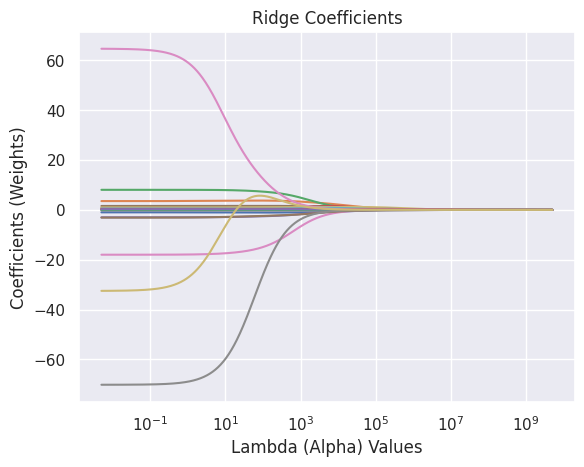

In [52]:
ridge_model_tuned = Ridge_Model_Tuned(df, "Salary", results=True, plot=True, save_model=True)

<a id="predictionTunedRidge" ></a>

## Loading a Tuned Ridge Model and Prediction

In [53]:
model_disc = load_model("ridge_model_tuned.pkl")

In [54]:
# Features of our sample
test_player

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
14,196.000,43.000,7,29.000,27.000,30.000,13.000,3231.000,825.000,36,376.000,290.000,238.000,80.000,45.000,8,True,False,True


In [55]:
# Real salary of the corresponding sample
df.iloc[14]["Salary"]

240.0

In [56]:
# Our model's prediction
model_disc.predict(test_player)[0]

313.2006241590889

<a id="lasso" ></a>

# Lasso Regression

In [57]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [58]:
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)

In [59]:
lasso_model.intercept_

254.73971290104592

In [60]:
lasso_model.coef_

array([-9.88594417e-01,  3.57653984e+00,  8.03706371e+00,  7.63889302e-01,
       -2.96711350e+00,  1.58869867e+00, -1.80322486e+01, -2.18998295e-01,
        9.76392590e-01,  5.64444607e-01,  1.70954411e-01,  1.74558500e-01,
       -4.35016183e-02,  4.01815003e-01,  2.73839200e-01, -3.05465927e+00,
        6.12601552e+01, -6.97502302e+01, -2.91182964e+01])

In [61]:
mean_squared_error(y_train, lasso_model.predict(X_train))

59778.57864019015

In [62]:
root_mean_squared_error(y_train, lasso_model.predict(X_train))

244.49658206238826

<a id="baseLasso" ></a>

## Creating a Base Lasso Model

In [63]:
def Lasso_Model(dataframe, target, test_size=0.20, alpha=0.1 ,results=False, save_model=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  lasso_model = Lasso(alpha=alpha).fit(X_train, y_train)

  if results:
    y_pred_train = lasso_model.predict(X_train)
    y_pred_test = lasso_model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred=y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred=y_pred_test)
    rmse_train = root_mean_squared_error(y_train, y_pred=y_pred_train)
    rmse_test = root_mean_squared_error(y_test, y_pred=y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred=y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred=y_pred_test)
    r2_train = r2_score(y_train, y_pred=y_pred_train)
    r2_test = r2_score(y_test, y_pred=y_pred_test)
    print(10*"=", "Results of Train Data", 10*"=")
    print("MSE Train: ", "%.4f" % mse_train)
    print("RMSE Train: ", "%.4f" % rmse_train)
    print("MAE Train: ", "%.4f" % mae_train)
    print("R2 Train: ", "%.4f" % r2_train)
    print(10*"=", "Results of Test Data", 10*"=")
    print("MSE Test: ", "%.4f" % mse_test)
    print("RMSE Test: ", "%.4f" % rmse_test)
    print("MAE Test: ", "%.4f" % mae_test)
    print("R2 Test: ", "%.4f" % r2_test)

  if save_model:
    joblib.dump(lasso_model, "lasso_model.pkl")

  return lasso_model

In [64]:
lasso_model = Lasso_Model(df, "Salary", results=True, save_model=True)

========== Results of Train Data ==========
MSE Train:  59778.5786
RMSE Train:  244.4966
MAE Train:  193.9163
R2 Train:  0.4676
========== Results of Test Data ==========
MSE Test:  75753.1000
RMSE Test:  275.2328
MAE Test:  218.7952
R2 Test:  0.4721


<a id="predictionBaseLasso" ></a>

## Loading a Base Lasso Model and Prediction

In [65]:
model_disc = load_model("lasso_model.pkl")

In [66]:
# Features of our sample
test_player

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
14,196.000,43.000,7,29.000,27.000,30.000,13.000,3231.000,825.000,36,376.000,290.000,238.000,80.000,45.000,8,True,False,True


In [67]:
# Real salary of the corresponding sample
df.iloc[14]["Salary"]

240.0

In [68]:
# Our model's prediction
model_disc.predict(test_player)[0]

301.2887087322671

<a id="tuneLasso" ></a>

## Tuning the Lasso Model

In [69]:
def Lasso_Model_Tuned(dataframe, target, cv=10, max_iter=10000, test_size=0.20, results=False, plot=False, save_model=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  lambdas = 10**np.linspace(10, -2, 1000)*0.5
  lasso_model = LassoCV(alphas=lambdas, cv=cv, max_iter=max_iter).fit(X_train, y_train)
  lasso_model_tuned = Lasso(alpha=lasso_model.alpha_).fit(X_train, y_train)

  if results:
    y_pred_train = lasso_model_tuned.predict(X_train)
    y_pred_test = lasso_model_tuned.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = root_mean_squared_error(y_train, y_pred_train)
    rmse_test = root_mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    print("MSE Train: ", "%.3f" % mse_train)
    print("RMSE Train: ", "%.3f" % rmse_train)
    print("MAE Train: ", "%.3f" % mae_train)
    print("R2 Train: ", "%.3f" % r2_train)
    print("MSE Test: ", "%.3f" % mse_test)
    print("RMSE Test: ", "%.3f" % rmse_test)
    print("MAE Test: ", "%.3f" % mae_test)
    print("R2 Test: ", "%.3f" % r2_test)


  if plot:
    lasso_model = Lasso()
    coefficients = []
    for i in lambdas:
      lasso_model.set_params(alpha=i)
      lasso_model.fit(X_train, y_train)
      coefficients.append(lasso_model.coef_)

    ax = plt.gca()
    ax.plot(lambdas, coefficients)
    ax.set_xscale("log")
    plt.xlabel("Lambda (Alpha) Values")
    plt.ylabel("Coefficients (Weights)")
    plt.title("Lasso Coefficients")

  if save_model:
    joblib.dump(lasso_model_tuned, "lasso_model_tuned.pkl")

  return lasso_model_tuned

MSE Train:  64221.111
RMSE Train:  253.419
MAE Train:  198.065
R2 Train:  0.428
MSE Test:  73998.717
RMSE Test:  272.027
MAE Test:  207.494
R2 Test:  0.484


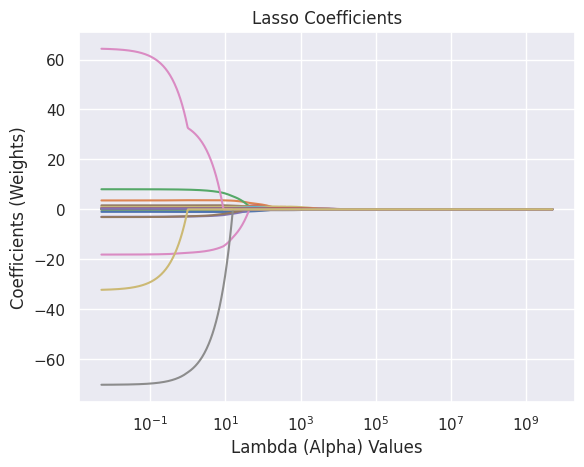

In [70]:
lasso_model_tuned = Lasso_Model_Tuned(df, "Salary", results=True, plot=True, save_model=True)

<a id="predictionTunedLasso" ></a>

## Loading a Tuned Lasso Model and Prediction

In [71]:
model_disc = load_model("lasso_model_tuned.pkl")

In [72]:
# Features of our sample
test_player

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
14,196.000,43.000,7,29.000,27.000,30.000,13.000,3231.000,825.000,36,376.000,290.000,238.000,80.000,45.000,8,True,False,True


In [73]:
# Real salary of the corresponding sample
df.iloc[14]["Salary"]

240.0

In [74]:
# Our model's prediction
model_disc.predict(test_player)[0]

290.6544433273431

<a id="elasticnet" ></a>

# ElasticNet Regression

In [75]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [76]:
enet_model = ElasticNet().fit(X_train, y_train)

In [77]:
enet_model.intercept_

229.77097251844498

In [78]:
enet_model.coef_

array([ -1.0673384 ,   3.74409473,   7.12471317,   0.73081186,
        -2.48684446,   1.61108894, -14.26740046,  -0.2407307 ,
         0.98918614,   0.49552124,   0.2250817 ,   0.19686043,
        -0.03147814,   0.39847982,   0.26297055,  -2.31714297,
        10.15990714, -21.30793926,   4.86014518])

In [79]:
mean_squared_error(y_train, enet_model.predict(X_train))

60549.82893799966

In [80]:
root_mean_squared_error(y_train, enet_model.predict(X_train))

246.06874839767778

<a id="baseElasticnet" ></a>

## Creating a Base ElasticNet Model

In [81]:
def Enet_Model(dataframe, target, test_size=0.20, results=False, save_model=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  enet_model = ElasticNet().fit(X_train, y_train)

  if results:
    y_pred_train = enet_model.predict(X_train)
    y_pred_test = enet_model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred=y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred=y_pred_test)
    rmse_train = root_mean_squared_error(y_train, y_pred=y_pred_train)
    rmse_test = root_mean_squared_error(y_test, y_pred=y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred=y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred=y_pred_test)
    r2_train = r2_score(y_train, y_pred=y_pred_train)
    r2_test = r2_score(y_test, y_pred=y_pred_test)
    print(10*"=", "Results of Train Data", 10*"=")
    print("MSE Train: ", "%.4f" % mse_train)
    print("RMSE Train: ", "%.4f" % rmse_train)
    print("MAE Train: ", "%.4f" % mae_train)
    print("R2 Train: ", "%.4f" % r2_train)
    print(10*"=", "Results of Test Data", 10*"=")
    print("MSE Test: ", "%.4f" % mse_test)
    print("RMSE Test: ", "%.4f" % rmse_test)
    print("MAE Test: ", "%.4f" % mae_test)
    print("R2 Test: ", "%.4f" % r2_test)

  if save_model:
    joblib.dump(enet_model, "enet_model.pkl")

  return enet_model

In [82]:
enet_model = Enet_Model(df, "Salary", results=True, save_model=True)

========== Results of Train Data ==========
MSE Train:  60549.8289
RMSE Train:  246.0687
MAE Train:  193.3499
R2 Train:  0.4608
========== Results of Test Data ==========
MSE Test:  76432.5451
RMSE Test:  276.4644
MAE Test:  217.7663
R2 Test:  0.4673


<a id="predictionBaseElasticnet" ></a>

## Loading a Base ElasticNet Model and Prediction

In [83]:
model_disc = load_model("enet_model.pkl")

In [84]:
# Features of our sample
test_player

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
14,196.000,43.000,7,29.000,27.000,30.000,13.000,3231.000,825.000,36,376.000,290.000,238.000,80.000,45.000,8,True,False,True


In [85]:
# Real salary of the corresponding sample
df.iloc[14]["Salary"]

240.0

In [86]:
# Our model's prediction
model_disc.predict(test_player)[0]

278.8867785287408

<a id="tuneElasticnet" ></a>

## Tuning the ElasticNet Model

In [87]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [88]:
def Enet_Model_Tuned(dataframe, target, cv=10, test_size=0.20, results=False, plot=False, save_model=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
  lambdas = 10**np.linspace(10, -2, 1000)*0.5
  enet_model = ElasticNetCV(alphas=lambdas, cv=cv).fit(X_train, y_train)
  enet_model_tuned = Lasso(alpha=enet_model.alpha_).fit(X_train, y_train)

  if results:
    y_pred_train = enet_model_tuned.predict(X_train)
    y_pred_test = enet_model_tuned.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = root_mean_squared_error(y_train, y_pred_train)
    rmse_test = root_mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    print("MSE Train: ", "%.3f" % mse_train)
    print("RMSE Train: ", "%.3f" % rmse_train)
    print("MAE Train: ", "%.3f" % mae_train)
    print("R2 Train: ", "%.3f" % r2_train)
    print("MSE Test: ", "%.3f" % mse_test)
    print("RMSE Test: ", "%.3f" % rmse_test)
    print("MAE Test: ", "%.3f" % mae_test)
    print("R2 Test: ", "%.3f" % r2_test)


  if plot:
    enet_model = ElasticNet()
    coefficients = []
    for i in lambdas:
      enet_model.set_params(alpha=i)
      enet_model.fit(X_train, y_train)
      coefficients.append(enet_model.coef_)

    ax = plt.gca()
    ax.plot(lambdas, coefficients)
    ax.set_xscale("log")
    plt.xlabel("Lambda (Alpha) Values")
    plt.ylabel("Coefficients (Weights)")
    plt.title("Enet Coefficients")

  if save_model:
    joblib.dump(enet_model_tuned, "enet_model_tuned.pkl")

  return enet_model_tuned

MSE Train:  65977.003
RMSE Train:  256.860
MAE Train:  200.901
R2 Train:  0.412
MSE Test:  77898.828
RMSE Test:  279.104
MAE Test:  214.110
R2 Test:  0.457


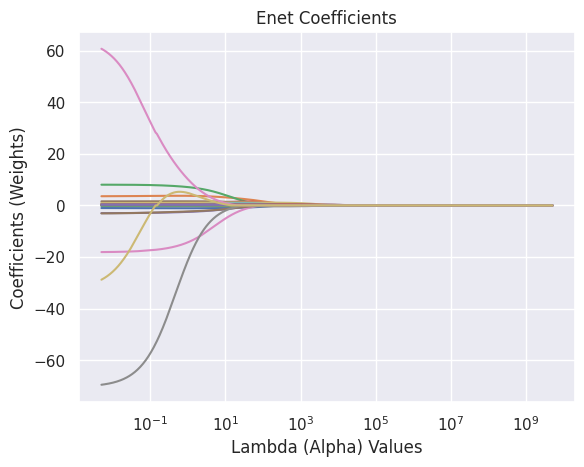

In [89]:
enet_model_tuned = Enet_Model_Tuned(df, "Salary", results=True, plot=True, save_model=True)

<a id="predictionTunedElasticnet" ></a>

## Loading a Tuned Ridge Model and Prediction

In [90]:
model_disc = load_model("enet_model_tuned.pkl")

In [91]:
# Features of our sample
test_player

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
14,196.000,43.000,7,29.000,27.000,30.000,13.000,3231.000,825.000,36,376.000,290.000,238.000,80.000,45.000,8,True,False,True


In [92]:
# Real salary of the corresponding sample
df.iloc[14]["Salary"]

240.0

In [93]:
# Our model's prediction
model_disc.predict(test_player)[0]

330.92253916114794